***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python Kinetics Code}}$$<br>
$\mathbf{\text{Date: 02/01/22}}$<br>
***

***
$\mathbf{\text{Simple Micro Kinetic Model for CO Oxidation}}:$<br>
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO

$$ CO + * \rightleftharpoons CO^{*} $$

Reaction 2:&emsp;Adsorption of $O_2$

$$ O_2 + * \rightleftharpoons {O_2}^{*} $$

Reaction 3:&emsp;Dissociation of ${O_2}^*$ 

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$

Reaction 4:&emsp;Surface Reaction of $CO$ and $O_2$  

$$ {CO}^{*} + {O}^{*} \rightleftharpoons CO_2 + 2* $$



***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. $O_2$
3. $CO_2$
4. $CO^*$
5. $O^*$
6. ${O_2}^*$
7. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO    &   O_2   &   CO_2  &      CO^*    &     O*     &    O_2^*     &   *\\
C   &   1     &   0     &   1     &      1       &     0      &     0        &   0\\
O   &   1     &   2     &   2     &      1       &     1      &     2        &   0\\
*   &   0     &   0     &   0     &      1       &     1      &     1        &   1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x7)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO} & P_{O_2} & P_{CO_2} & \theta_{CO} & \theta_{O} & \theta_{O_2} &\theta_{*}\\
r_1 &  -1     &   0     &   0     &      1       &     0      &     0        &  -1\\
r_2 &   0     &  -1     &   0     &      0       &     0      &     1        &  -1\\
r_3 &   0     &   0     &   0     &      0       &     2      &    -1        &  -1\\     
r_4 &   0     &   0     &   1     &     -1       &    -1      &     0        &   2\end{bmatrix} 
\
\end{equation}

Stoichiometric Matrix Size : (4x7)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{\nu_i} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{\nu_i}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$R_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$



In [21]:
%matplotlib notebook
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize

In [22]:
Stoich = pd.read_csv("Stoic_Input.csv")    #Opening/Reading the Stoichiometric input file needed to be read
Atomic = pd.read_csv("Atom_Input.csv")     #Opening/Reading the Atomic input file needed to be read
Param = pd.read_csv("Param_Input.csv")     #Opening/Reading the Parameter input file needed to be read   
print("Reaction\Stoichiometric Matrix:\n",Stoich)
print("\n Atomic\Species Matrix:\n",Atomic)
print("\n Parameters Matrix:\n",Param)

Reaction\Stoichiometric Matrix:
   r\S  P_CO  P_O2  P_CO2  theta_CO  theta_O  theta_O2  theta_*
0  r1    -1     0      0         1        0         0       -1
1  r2     0    -1      0         0        0         1       -1
2  r3     0     0      0         0        2        -1       -1
3  r4     0     0      1        -1       -1         0        2

 Atomic\Species Matrix:
   A\S  CO  O2  CO2  CO*  O*  O2*  *
0   C   1   0    1    1   0    0  0
1   O   1   2    2    1   1    2  0
2   *   0   0    0    1   1    1  1

 Parameters Matrix:
    Reaction  Parameter        Values        Units
0       NaN       Temp  3.200000e+02            K
1       NaN   Pressure  1.000000e-08          bar
2       NaN  Gas Const  8.314460e+00  JK^-1mol^-1
3        r1        k1f  2.000000e+00            -
4       NaN        k1r  6.650000e-09            -
5        r2        k2f  2.310000e+02            -
6       NaN        k2r  1.150000e+05            -
7        r3        k3f  6.130000e+08            -
8       Na

In [23]:
#Checking the mass balance
at_mat = Atomic.iloc[0:,1:]           #The atomic matrix
err = 0                               #For counting error
for i in np.arange(len(Stoich)):    
    st_mat = Stoich.iloc[i,1:]        #The stoichiometric matrix
    res = np.dot(at_mat,st_mat)       #Performing the matrix product for every reaction i
    if any(a != 0 for a in res):      #Verifies that the matrix product returns 0s (i.e mass is balanced)
        print("Mass is not conserved in reaction %i. \n ... Check and correct the Atomic or Stoichiometric Matrices"%(i+1))
        err +=1
    elif (i == len(Stoich)-1 and err==0):    
        print("Mass is conserved.")

Mass is conserved.


In [24]:
#Extracting K values
def kextract(Param):
    #Evaluating Param file to find where the list of rate constants k starts
    for j in np.arange(len(Param.iloc[:,1])):
        if ('k1f' or 'k1') in Param.iloc[j,1]:
            kstart = j #Row in the Param file where rate constants begin
            break
        else:
            continue

    #Rate Constants:
    k = Param.iloc[kstart:,2].values #.values changes from pandas series to numpy array, allows for more optimization
    return k

In [45]:
def sol(t,u,k,Atomic,Stoich):
    #Only need to change:
   
    #------------------------------------------
    # 1 = CO ; 2 = O ; 3 = O2 ; 4 = *
    #Surface Coverage 
    th1 = u[0] #Theta_CO 
    th2 = u[1] #Theta_O
    th3 = u[2] #Theta_O2
    th4 = u[3] #Theta_*
    THETA = [th1,th2,th3,th4] #Coverages being investigated
        #Partial Pressures (Assuming all same as P)
    P1 = Param.iloc[1,2]#P_CO
    P2 = Param.iloc[1,2]#P_O2
    P3 = Param.iloc[1,2]#P_CO2
    #------------------------------------------
    
    Nr = len(Stoich) #Number of rows in your your stoich matrix, i.e (Number of reactions)
    

    kf = k[0::2] #Pulling out the forward rxn rate constants (::2 means every other value, skip by a step of 2)
    kr = k[1::2] #Pulling out the reverse rxn rate constants 

    D = []      #Empty Vector For holding rate of change of coverage values
    r = [None] * Nr  #Empty Vector for holding rate of a specific reaction
    
    #Calculating the rates of reactions:
    for j in np.arange(Nr):   #Looping through the reactions
        matr = [P1,P2,P3]+THETA
        fwd = []
        rvs = []
        for i in np.arange(len(Stoich.iloc[0,:])-1):
            if Stoich.iloc[j,i+1]<0: #extracting only forward relevant rate parameters  #forward rxn reactants /encounter probability
                fwd.append(matr[i]**abs(Stoich.iloc[j,i+1]))
                
            if Stoich.iloc[j,i+1]>0: #extracting only reverse relevant rate parameters  #reverse rxn reactants /encounter probability
                rvs.append(matr[i]**abs(Stoich.iloc[j,i+1]))   
                
        r[j] = (kf[j]*np.prod(fwd)) - (kr[j]*np.prod(rvs)) #Calculating the rate of reaction
    

    #Differential Equations to calculate the change in coverages
    for i in np.arange(len(Stoich.iloc[:,4:])):
        dsum=0
        for j in np.arange(Nr):
            
            dsum += Stoich.iloc[j,i+4]*r[j] #Calculating the rate of production of a species i
        
        D.append(dsum)

    return D  #   CO |  O  |  O2   |  *

def Kinetics(k,Atomic,Stoich,init,Time,Teval=None):
    t_span = (Time[0], Time[-1])
    solve = solve_ivp(sol,t_span,init, args=(k,Atomic,Stoich),method='BDF', t_eval=Teval, rtol = 1E-6,atol = 1E-8)
    solv = np.transpose(solve.y)
    #print(k)
    return solv


Running the ODE solver: (Getting the coverage profiles)

In [46]:
%%time
#initial values:
TCO_in = 0.0
TO_in = 0.0
TO2_in = 0.0
TE_in = 1 - TCO_in-TO_in-TO2_in
#init      CO | O  | O2   | *
init = [TCO_in,TO_in,TO2_in,TE_in]  #initial values

k = kextract(Param)
actual = k #To be used to compare prediction
Time =np.linspace(0, 6e6, num=1000)
t_span = (Time[0], Time[-1])
solve = solve_ivp(sol,t_span,init, args=(k,Atomic,Stoich),method='BDF',  rtol = 1E-6,atol = 1E-8)#Obtaining the resulting Concentration of Coverages
solv = np.transpose(solve.y)
time_sol = np.transpose(solve.t) 

print(len(time_sol))

148
CPU times: user 636 ms, sys: 4.02 ms, total: 640 ms
Wall time: 638 ms


Plotting:

<IPython.core.display.Javascript object>


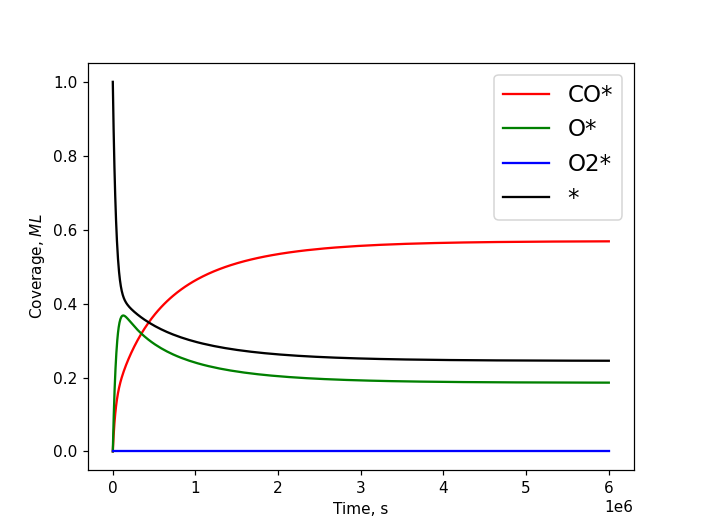

In [47]:
%matplotlib notebook
C_CO = solv[:,0]
C_O = solv[:,1]
C_O2 = solv[:,2]
C_E = solv[:,3]

plt.figure(1)
plt.plot(time_sol, C_CO,'r-', label='CO*')        
plt.plot(time_sol, C_O,'g-', label='O*') 
plt.plot(time_sol, C_O2, 'b-', label='O2*') 
plt.plot(time_sol, C_E, 'k-', label='*') 

plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=15, loc='best')
plt.show()

<IPython.core.display.Javascript object>


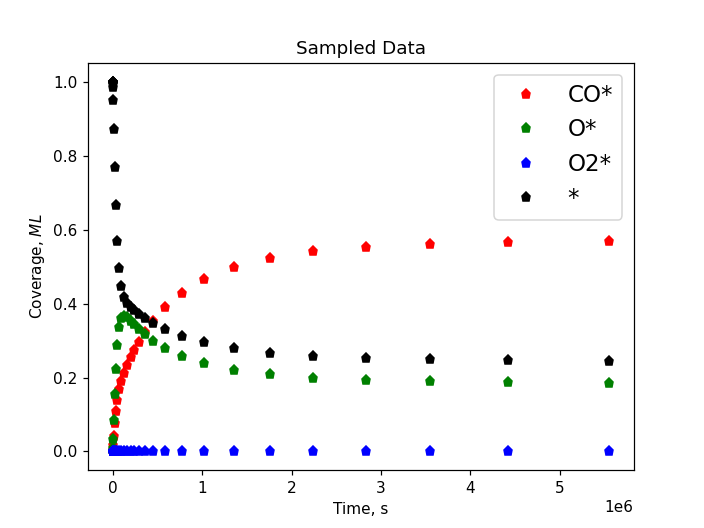

In [48]:
n = 30
Time_t = time_sol[::round(len(time_sol)/n)]
C_t_CO = C_CO[::round(len(C_CO)/n)]
C_t_O = C_O[::round(len(C_O)/n)]
C_t_O2 = C_O2[::round(len(C_O2)/n)]
C_t_E = C_E[::round(len(C_E)/n)]

plt.figure(2)
plt.plot(Time_t, C_t_CO,'rp', label='CO*')        
plt.plot(Time_t, C_t_O,'gp', label='O*') 
plt.plot(Time_t, C_t_O2, 'bp', label='O2*') 
plt.plot(Time_t, C_t_E, 'kp', label='*')

plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.title('Sampled Data')
plt.legend(fontsize=15, loc='best')
plt.show()

<IPython.core.display.Javascript object>


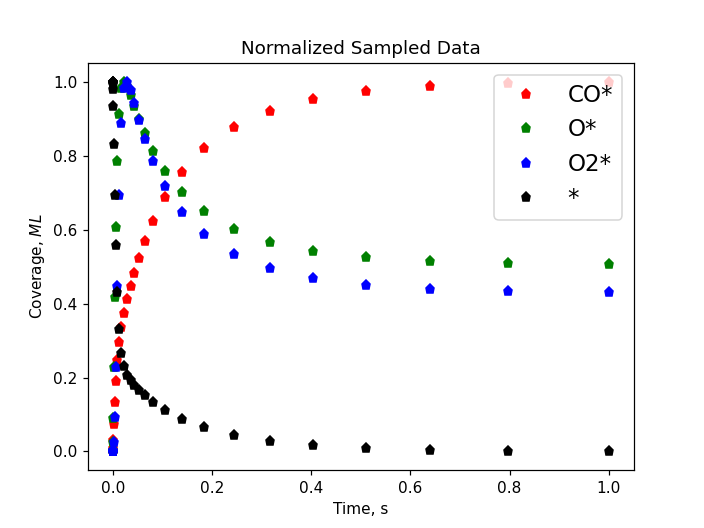

In [49]:
#Feature Scaling - Normalization
mint = min(Time_t)
maxt = max(Time_t)
Time_tn = (Time_t-mint)/(maxt-mint)
minCO = min(C_t_CO)
maxCO = max(C_t_CO)
C_t_COn = (C_t_CO-minCO)/(maxCO-minCO)
minO = min(C_t_O)
maxO = max(C_t_O)
C_t_On = (C_t_O-minO)/(maxO-minO)
minO2 = min(C_t_O2)
maxO2 = max(C_t_O2)
C_t_O2n = (C_t_O2-minO2)/(maxO2-minO2)
minE = min(C_t_E)
maxE = max(C_t_E)
C_t_En = (C_t_E-minE)/(maxE-minE)

plt.figure(3)
plt.plot(Time_tn, C_t_COn,'rp', label='CO*')        
plt.plot(Time_tn, C_t_On,'gp', label='O*') 
plt.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
plt.plot(Time_tn, C_t_En, 'kp', label='*')

plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.title('Normalized Sampled Data')
plt.legend(fontsize=15, loc='best')
plt.show()

In [50]:
Guess_Param = pd.read_csv("Param_Input_Guess.csv")     #Opening/Reading the Parameter input file needed to be read   
print("\n The Guess Parameters Matrix:\n",Guess_Param)
print("\n")


 The Guess Parameters Matrix:
    Reaction  Parameter        Values        Units
0       NaN       Temp  3.200000e+02            K
1       NaN   Pressure  1.000000e-08          bar
2       NaN  Gas Const  8.314460e+00  JK^-1mol^-1
3        r1        k1f  1.000000e+00            -
4       NaN        k1r  1.000000e-09            -
5        r2        k2f  1.000000e+02            -
6       NaN        k2r  1.000000e+05            -
7        r3        k3f  1.000000e+08            -
8       NaN        k3r  1.000000e-04            -
9        r4        k4f  1.000000e-08            -
10      NaN        k4r  1.000000e+02            -




In [51]:
Guessk = kextract(Guess_Param)

$$ error = \left <(c_{pred} - c_{actual})^2 \right> $$

In [52]:
C_dat = np.c_[C_t_CO,C_t_O,C_t_O2,C_t_E]
C_datn = np.c_[C_t_COn,C_t_On,C_t_O2n,C_t_En] #Normalized Concentrations

def minfunc(Guessk,Atomic,Stoich,Time,Conc):
    Conc_init = Conc[0,:]
    c_estim = Kinetics(Guessk,Atomic,Stoich,Conc_init,Time,Time)
    c_estim[:,0] = (c_estim[:,0]-minCO)/(maxCO-minCO)
    c_estim[:,1] = (c_estim[:,1]-minO)/(maxO-minO)
    c_estim[:,2] = (c_estim[:,2]-minO2)/(maxO2-minO2)
    c_estim[:,3] = (c_estim[:,3]-minE)/(maxE-minE)
    w = 1
    error_t = (1/4)*(w*(Conc[:,0] - c_estim[:,0])**2 +w*(Conc[:,1] - c_estim[:,1])**2 +w*(Conc[:,2] - c_estim[:,2])**2 +w*(Conc[:,3] - c_estim[:,3])**2)
        
    error = sum(error_t)
    return error  

# [ A ] Local Optimizer: Using Curve Fit [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

### Simple Fitting Using Curve Fit - Implementing Kinetic Function

In [65]:
%%time
from numpy import inf
def curvefitfn(C_dat,Time_t,C_datn,Time_tn,k,Atomic,Stoich,plt=False):
    def test_func(x, *Guess):
        #Guess = np.asarray(Guess)
        Conc_init = C_dat[0,:]
        func = Kinetics(Guess,Atomic,Stoich,Conc_init,Time_t,Time_t)
        func[:,0] = (func[:,0]-minCO)/(maxCO-minCO)
        func[:,1] = (func[:,1]-minO)/(maxO-minO)
        func[:,2] = (func[:,2]-minO2)/(maxO2-minO2)
        func[:,3] = (func[:,3]-minE)/(maxE-minE)
        func = np.reshape(func, func.size)
        return  func 

    x_values = Time_tn
    y_values = np.reshape(C_datn, C_datn.size)
    params, params_covariance = optimize.curve_fit(test_func, x_values, y_values, method ='trf', 
                                                    bounds=(0,inf), full_output=True, maxfev=1e5, ftol = 1e
                                                    ,p0=k)
    yfit = test_func(x_values, *params)

    c_fit=yfit.reshape(np.shape(C_datn)) 
    if plt==False:
        return c_fit,params,params_covariance
    else:
        return c_fit

CPU times: user 18 µs, sys: 1 µs, total: 19 µs
Wall time: 23.8 µs


In [66]:
%%time
c_fit,params,params_covariance = curvefitfn(C_dat,Time_t,C_datn,Time_tn,k,Atomic,Stoich)
print(params)
print('conf:', np.sqrt(np.diag(params_covariance)))

[2.00e+00 6.65e-09 2.31e+02 1.15e+05 6.13e+08 2.14e-02 2.85e-06 5.00e+02]
conf: [1.79647330e-13 2.07306275e-22 9.75264902e-14 1.32689010e-11
 1.03260520e-19 1.22779317e-18 3.35109083e-21 2.64043447e-13]
CPU times: user 6.97 s, sys: 360 ms, total: 7.33 s
Wall time: 6.41 s


## Using CurveFit : Varying inital k value guesses - *resizing the initial values

In [136]:
%%time
from ipywidgets import interact_manual,interactive
import ipywidgets as widgets

def curvefitplot(val):
    fig, ax = plt.subplots()
    ax.plot(Time_tn, C_t_COn,'rp', label='CO*')        
    ax.plot(Time_tn, C_t_On,'gp', label='O*') 
    ax.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
    ax.plot(Time_tn, C_t_En, 'kp', label='*') 
    ax.set_title("Using Curve Fit - With Function Fit being of Kinetic Origin")
    ax.set_xlabel('Time, s')
    ax.set_ylabel("Coverage, $ML$")
    ax.legend(fontsize=8, loc='best')
    const = k * (1+(val/100))
    fit,params,params_covariance = curvefitfn(C_dat,Time_t,C_datn,Time_tn,const,Atomic,Stoich,plt=False)
    line1, = plt.plot(Time_tn, fit[:,0], 'r-')
    line2, = plt.plot(Time_tn, fit[:,1], 'g-')
    line3, = plt.plot(Time_tn, fit[:,2], 'b-')
    line4, = plt.plot(Time_tn, fit[:,3], 'k-')
    print('Actual, k: \n',actual , '\n')
    print('Initial guess, k_Guess: \n', const, '\n')
    print('final prediction, k_predict: \n',params , '\n')
    print('conf:', np.sqrt(np.diag(params_covariance)))
    print('conf:', np.sqrt(np.diag(params_covariance))/actual)

interactive(curvefitplot, {'manual': True}, val = widgets.IntSlider(value=0, min=-150, max=150, step=10))


CPU times: user 16.9 ms, sys: 4.51 ms, total: 21.4 ms
Wall time: 19.7 ms


interactive(children=(IntSlider(value=0, description='val', max=150, min=-150, step=10), Button(description='R…

## Using CurveFit : Varying inital k value guesses - *resizing the initial values with random numbers

<IPython.core.display.Javascript object>


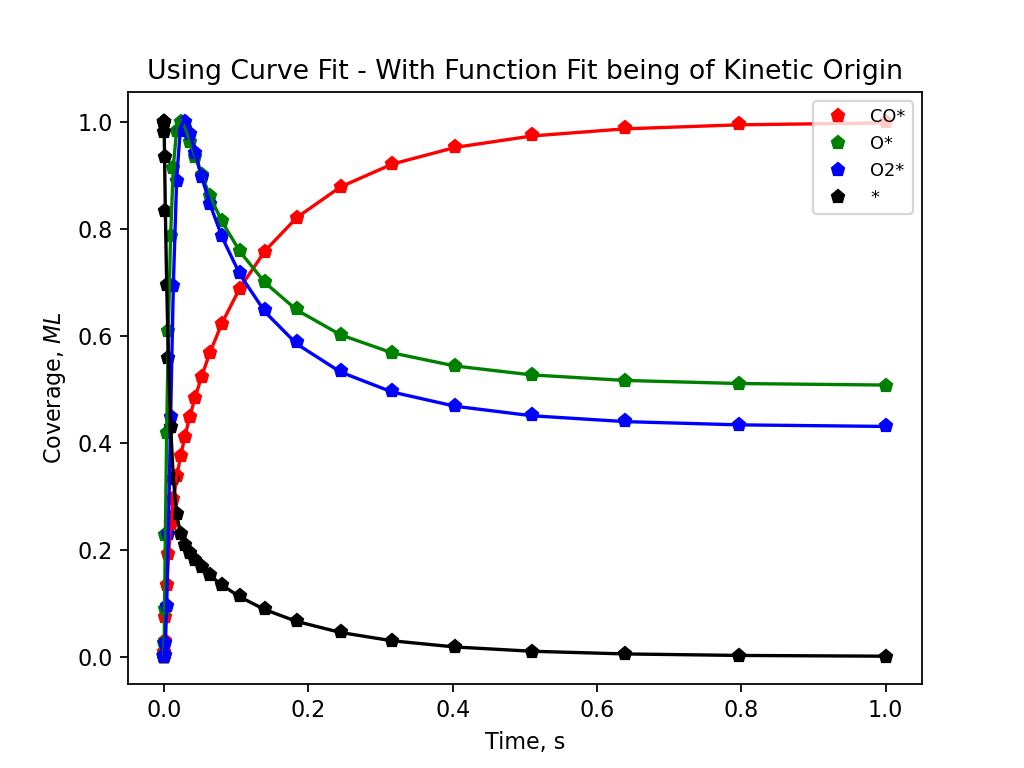

Actual, k: 
 [2.00e+00 6.65e-09 2.31e+02 1.15e+05 6.13e+08 2.14e-02 2.85e-06 5.00e+02] 

Random resizing matirx: 
 [0.9664554317141941, 4.2564652170089685, 7.8215156579685985, 0.2590277412660566, 0.15863299484047372, 0.879083154626964, 0.40149341705106845, 0.20089769541327282] 

Initial guess, k_Guess: 
 [1.93291086e+00 2.83054937e-08 1.80677012e+03 2.97881902e+04
 9.72420258e+07 1.88123795e-02 1.14425624e-06 1.00448848e+02] 

final prediction, k_predict: 
 [6.11326594e+01 2.05914333e-10 2.62629396e+02 1.15998994e+05
 6.98687528e+08 2.43244792e-02 3.77304990e-06 4.12692420e+02] 

conf: [5.79937784e+00 6.72384668e-09 3.13632610e+00 4.30794082e+02
 3.77589348e-07 4.52398315e-05 1.09596733e-07 8.44570350e+00]
CPU times: user 2min, sys: 6.36 s, total: 2min 6s
Wall time: 1min 50s


In [68]:
%%time
from ipywidgets import interact_manual,interactive
import ipywidgets as widgets

fig, ax = plt.subplots()
ax.plot(Time_tn, C_t_COn,'rp', label='CO*')        
ax.plot(Time_tn, C_t_On,'gp', label='O*') 
ax.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
ax.plot(Time_tn, C_t_En, 'kp', label='*') 
ax.set_title("Using Curve Fit - With Function Fit being of Kinetic Origin")
ax.set_xlabel('Time, s')
ax.set_ylabel("Coverage, $ML$")
ax.legend(fontsize=8, loc='best')
#random matrix:
ranmat = []
for i in np.arange(len(actual)):
    #ranmat.append( abs((1+(np.random.uniform(100,-100)/100))) )
    ranmat.append( 10**(np.random.uniform(-2,2)) )
const = actual * ranmat
fit,params,params_covariance = curvefitfn(C_dat,Time_t,C_datn,Time_tn,const,Atomic,Stoich,plt=False)
line1, = plt.plot(Time_tn, fit[:,0], 'r-')
line2, = plt.plot(Time_tn, fit[:,1], 'g-')
line3, = plt.plot(Time_tn, fit[:,2], 'b-')
line4, = plt.plot(Time_tn, fit[:,3], 'k-')
print('Actual, k: \n',actual , '\n')
print('Random resizing matirx: \n', ranmat,'\n')
print('Initial guess, k_Guess: \n', const, '\n')
print('final prediction, k_predict: \n',params , '\n')
print('conf:', np.sqrt(np.diag(params_covariance)))

# [B] Local Optimizer: L-BFGS-B [Link](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html)

## Using L-BFGS-B: Varying inital k value guesses - *resizing the initial values

In [102]:
%%time

from ipywidgets import interact_manual,interactive
import ipywidgets as widgets

def LBFGSB(val):
    fig, ax = plt.subplots()
    ax.plot(Time_tn, C_t_COn,'rp', label='CO*')        
    ax.plot(Time_tn, C_t_On,'gp', label='O*') 
    ax.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
    ax.plot(Time_tn, C_t_En, 'kp', label='*') 
    ax.set_title("Using L-BFGS-B")
    ax.set_xlabel('Time, s')
    ax.set_ylabel("Coverage, $ML$")
    ax.legend(fontsize=8, loc='best')
    const = k * (1+(val/100))
    #max K Guess parameters #Setting Bounds
    sc = 1e2 #scaling value
    mkval = const*sc #max kvals
    bounds = np.empty([len(mkval),2])
    for i in range(len(mkval)):
        bounds[i] = (0,mkval[i])
    result = optimize.minimize(minfunc,const,args=(Atomic,Stoich,Time_t,C_dat,), method="L-BFGS-B",jac = '3-way', bounds=bounds , options={'maxcor': 100, 'ftol': 1e-3, 'gtol': 1e-15, 'eps': 1e-18, 'maxfun': 15000,'disp': False,'maxiter': 10, 'iprint': - 1, 'maxls': 35})  
    k_fit = result.x
    fit = Kinetics(k_fit,Atomic,Stoich,init,Time_t,Time_t)
    fit[:,0] = (fit[:,0]-minCO)/(maxCO-minCO)
    fit[:,1] = (fit[:,1]-minO)/(maxO-minO)
    fit[:,2] = (fit[:,2]-minO2)/(maxO2-minO2)
    fit[:,3] = (fit[:,3]-minE)/(maxE-minE)
    line1, = plt.plot(Time_tn, fit[:,0], 'r-')
    line2, = plt.plot(Time_tn, fit[:,1], 'g-')
    line3, = plt.plot(Time_tn, fit[:,2], 'b-')
    line4, = plt.plot(Time_tn, fit[:,3], 'k-')
    print('Actual, k: \n',actual , '\n')
    print('Initial guess, k_Guess: \n', const, '\n')
    print('final prediction, k_predict: \n',k_fit , '\n')

interactive(LBFGSB, {'manual': True}, val = widgets.IntSlider(value=0, min=-150, max=150, step=10))


CPU times: user 20.3 ms, sys: 1.99 ms, total: 22.3 ms
Wall time: 20.8 ms


interactive(children=(IntSlider(value=0, description='val', max=150, min=-150, step=10), Button(description='R…

## Using L-BFGS-B: Varying inital k value guesses -*multyplying random error

<IPython.core.display.Javascript object>


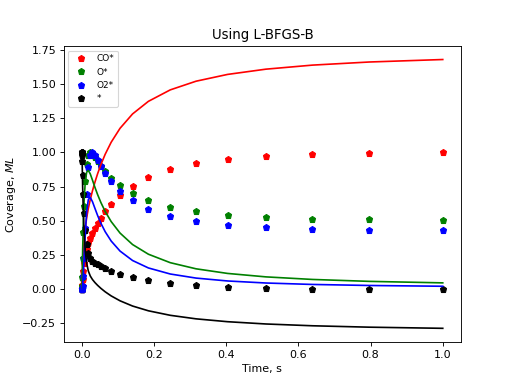

Actual, k: 
 [2.00e+00 6.65e-09 2.31e+02 1.15e+05 6.13e+08 2.14e-02 2.85e-06 5.00e+02] 

Initial guess, k_Guess: 
 [1.20698838e+00 2.73124305e-09 9.74287605e+01 1.43442437e+05
 5.50483066e+08 1.40398096e-02 5.08839092e-08 1.13171533e+03] 

final prediction, k_predict: 
 [1.20698838e+00 2.73124305e-09 9.74287605e+01 1.43442437e+05
 5.50483066e+08 1.40398096e-02 5.08839092e-08 1.13171533e+03] 

CPU times: user 2min 47s, sys: 1.65 s, total: 2min 48s
Wall time: 2min 48s


In [23]:
%%time
from ipywidgets import interact_manual,interactive
import ipywidgets as widgets

fig, ax = plt.subplots()
ax.plot(Time_tn, C_t_COn,'rp', label='CO*')        
ax.plot(Time_tn, C_t_On,'gp', label='O*') 
ax.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
ax.plot(Time_tn, C_t_En, 'kp', label='*') 
ax.set_title("Using L-BFGS-B")
ax.set_xlabel('Time, s')
ax.set_ylabel("Coverage, $ML$")
ax.legend(fontsize=8, loc='best')
#random matrix:
ranmat = []
for i in np.arange(len(actual)):
    ranmat.append( abs((1+(np.random.uniform(100,-100)/100))) )
const = actual * ranmat
#max K Guess parameters #Setting Bounds
sc = 1e2 #scaling value
mkval = const*sc #max kvals
bounds = np.empty([len(mkval),2])
for i in range(len(mkval)):
    bounds[i] = (0,mkval[i])
result = optimize.minimize(minfunc,const,args=(Atomic,Stoich,Time_t,C_dat,), method="L-BFGS-B",  bounds=bounds , options={'maxcor': 100, 'ftol': 1e-3, 'gtol': 1e-15, 'eps': 1e-18, 'maxfun': 15000,'disp': False,'maxiter': 10, 'iprint': - 1, 'maxls': 35})      
k_fit = result.x
fit = Kinetics(k_fit,Atomic,Stoich,init,Time_t,Time_t)
fit[:,0] = (fit[:,0]-minCO)/(maxCO-minCO)
fit[:,1] = (fit[:,1]-minO)/(maxO-minO)
fit[:,2] = (fit[:,2]-minO2)/(maxO2-minO2)
fit[:,3] = (fit[:,3]-minE)/(maxE-minE)
line1, = plt.plot(Time_tn, fit[:,0], 'r-')
line2, = plt.plot(Time_tn, fit[:,1], 'g-')
line3, = plt.plot(Time_tn, fit[:,2], 'b-')
line4, = plt.plot(Time_tn, fit[:,3], 'k-')
print('Actual, k: \n',actual , '\n')
print('Initial guess, k_Guess: \n', const, '\n')
print('final prediction, k_predict: \n',k_fit , '\n')

## Using L-BFGS-B : Varying inital k value guesses - *resizing the initial values with random numbers

<IPython.core.display.Javascript object>


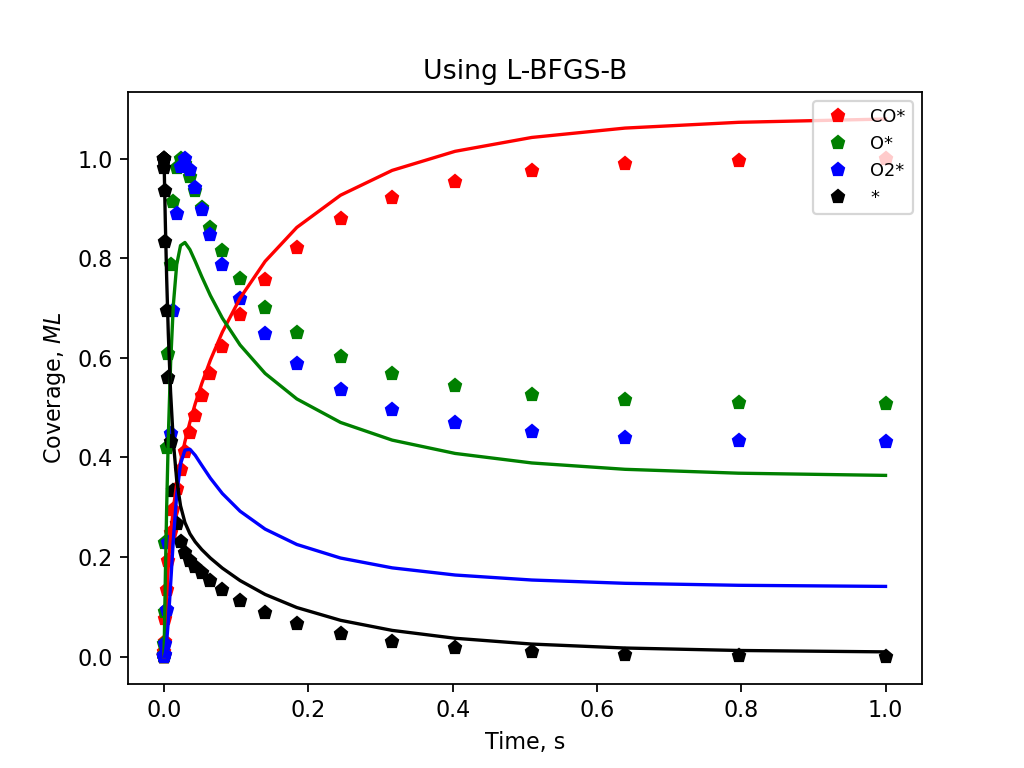

/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Actual, k: 
 [2.00e+00 6.65e-09 2.31e+02 1.15e+05 6.13e+08 2.14e-02 2.85e-06 5.00e+02] 

Random resizing matirx: 
 [0.47251368430166907, 1.7507792896779781, 0.48703320971213737, 1.5506455206066252, 1.2341451947547317, 0.8061358752747885, 1.152404815616637, 0.8648891613696417] 

Initial guess, k_Guess: 
 [9.45027369e-01 1.16426823e-08 1.12504671e+02 1.78324235e+05
 7.56531004e+08 1.72513077e-02 3.28435372e-06 4.32444581e+02] 

final prediction, k_predict: 
 [9.45027369e-01 1.16426823e-08 1.12504671e+02 1.78324235e+05
 7.56531004e+08 1.72513077e-02 3.28435372e-06 4.32444581e+02] 

CPU times: user 5.97 s, sys: 34.4 ms, total: 6 s
Wall time: 5.99 s


In [47]:
%%time
from ipywidgets import interact_manual,interactive
import ipywidgets as widgets

fig, ax = plt.subplots()
ax.plot(Time_tn, C_t_COn,'rp', label='CO*')        
ax.plot(Time_tn, C_t_On,'gp', label='O*') 
ax.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
ax.plot(Time_tn, C_t_En, 'kp', label='*') 
ax.set_title("Using L-BFGS-B")
ax.set_xlabel('Time, s')
ax.set_ylabel("Coverage, $ML$")
ax.legend(fontsize=8, loc='best')
#random matrix:
ranmat = []
for i in np.arange(len(actual)):
    ranmat.append( abs((1+(np.random.uniform(100,-100)/100))) )
const = actual * ranmat
#max K Guess parameters #Setting Bounds
sc = 1e2 #scaling value
mkval = const*sc #max kvals
bounds = np.empty([len(mkval),2])
for i in range(len(mkval)):
    bounds[i] = (0,mkval[i])
result = optimize.minimize(minfunc,const,args=(Atomic,Stoich,Time_t,C_dat,), method="L-BFGS-B", jac = 'cs', bounds=bounds , options={'maxcor': 100, 'ftol': 1e-3, 'gtol': 1e-15, 'eps': 1e-18, 'maxfun': 15000,'disp': False,'maxiter': 10, 'iprint': - 1, 'maxls': 35})      
k_fit = result.x
fit = Kinetics(k_fit,Atomic,Stoich,init,Time_t,Time_t)
fit[:,0] = (fit[:,0]-minCO)/(maxCO-minCO)
fit[:,1] = (fit[:,1]-minO)/(maxO-minO)
fit[:,2] = (fit[:,2]-minO2)/(maxO2-minO2)
fit[:,3] = (fit[:,3]-minE)/(maxE-minE)
line1, = plt.plot(Time_tn, fit[:,0], 'r-')
line2, = plt.plot(Time_tn, fit[:,1], 'g-')
line3, = plt.plot(Time_tn, fit[:,2], 'b-')
line4, = plt.plot(Time_tn, fit[:,3], 'k-')
print('Actual, k: \n',actual , '\n')
print('Random resizing matirx: \n', ranmat,'\n')
print('Initial guess, k_Guess: \n', const, '\n')
print('final prediction, k_predict: \n',k_fit , '\n')

# [ C ] Global Optimizer: Using Differential Evolution [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html)

In [53]:
%%time
from scipy.optimize import curve_fit, differential_evolution    

def error_fun(Guessk,Atomic,Stoich,Time,Conc):
    Conc_init = Conc[0,:]
    y_estim = Kinetics(Guessk,Atomic,Stoich,Conc_init,Time,Time)
    y_estim[:,0] = (y_estim[:,0]-minCO)/(maxCO-minCO)
    y_estim[:,1] = (y_estim[:,1]-minO)/(maxO-minO)
    y_estim[:,2] = (y_estim[:,2]-minO2)/(maxO2-minO2)
    y_estim[:,3] = (y_estim[:,3]-minE)/(maxE-minE)    
    y_data = Conc
    return np.sum((y_data - y_estim) ** 2)

#max K Guess parameters
sc = 1e2 #scaling value
mkval = Guessk*sc #max kvals
bounds = np.empty([len(mkval),2])
for i in range(len(mkval)):
    bounds[i] = (0,mkval[i])
    
res = differential_evolution(error_fun,
                             bounds= bounds,
                             strategy='randtobest1exp',
                             args=(Atomic,Stoich,Time_t,C_dat),
                             seed=45, maxiter=5,disp=False, polish=True,workers=1)

CPU times: user 12min 46s, sys: 1.83 s, total: 12min 48s
Wall time: 12min 56s


[9.37846700e+00 1.00000000e-07 2.34531686e+01 9.11168409e+06
 3.26299597e+09 6.90596957e-04 1.00000000e-06 2.59213548e+02]


<IPython.core.display.Javascript object>


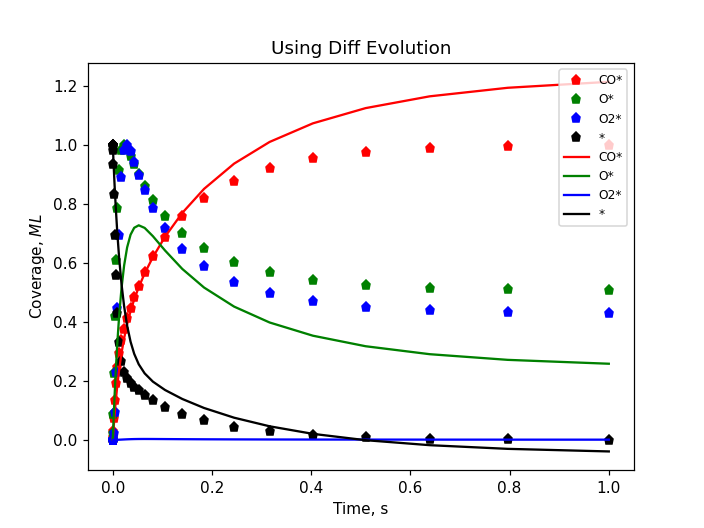

In [54]:
k_fit = res.x
print(k_fit)
c_fit = Kinetics(k_fit,Atomic,Stoich,C_dat[0,:],Time_t,Time_t)

C_fit_CO = (c_fit[:,0]-minCO)/(maxCO-minCO)
C_fit_O = (c_fit[:,1]-minO)/(maxO-minO)
C_fit_O2 = (c_fit[:,2]-minO2)/(maxO2-minO2)
C_fit_E = (c_fit[:,3]-minE)/(maxE-minE)

plt.figure()
#Replotting the extracted dataset
plt.plot(Time_tn, C_t_COn,'rp', label='CO*')        
plt.plot(Time_tn, C_t_On,'gp', label='O*') 
plt.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
plt.plot(Time_tn, C_t_En, 'kp', label='*') 

#Plotting the fit

plt.plot(Time_tn, C_fit_CO,'r-', label='CO*')        
plt.plot(Time_tn, C_fit_O,'g-', label='O*') 
plt.plot(Time_tn, C_fit_O2, 'b-', label='O2*') 
plt.plot(Time_tn, C_fit_E, 'k-', label='*') 


plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=8, loc='best')
plt.title("Using Diff Evolution")
plt.show()

# [ D ] Global Optimizer: Using SHGO - Simplicial homology global optimization [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.shgo.html#scipy.optimize.shgo)

In [133]:
%%time
from scipy.optimize import shgo    

def error_fun(Guessk,Atomic,Stoich,Time,Conc):
    Conc_init = Conc[0,:]
    y_estim = Kinetics(Guessk,Atomic,Stoich,Conc_init,Time,Time)
    y_estim[:,0] = (y_estim[:,0]-minCO)/(maxCO-minCO)
    y_estim[:,1] = (y_estim[:,1]-minO)/(maxO-minO)
    y_estim[:,2] = (y_estim[:,2]-minO2)/(maxO2-minO2)
    y_estim[:,3] = (y_estim[:,3]-minE)/(maxE-minE)    
    y_data = Conc
    return np.sum((y_data - y_estim) ** 2)

#max K Guess parameters
sc = 1e2 #scaling value
mkval = Guessk*sc #max kvals
bounds = np.empty([len(mkval),2])
for i in range(len(mkval)):
    bounds[i] = (0,mkval[i])
    
res_c = shgo(error_fun,bounds= bounds,
                     args=(Atomic,Stoich,Time_t,C_dat),
                     iters=1, options = {'ftol': 1e-05, 'gtol': 1e-05,'maxfun': 400, 'maxiter': 2, 'disp' : True})

Splitting first generation
Successfully completed construction of complex.
CPU times: user 3min 14s, sys: 584 ms, total: 3min 14s
Wall time: 3min 14s


In [134]:
def CI95(fvec, jac):
    #Returns the 95% confidence interval on parameters
    
    rss = np.sum(fvec**2) # residual sum of squares
    
    n, p = jac.shape     # number of data points and parameters
   
    nmp = n - p          # the statistical degrees of freedom
    
    ssq = rss / nmp      # mean residual error
    
    J = np.matrix(jac)   # the Jacobian
    
    c = inv(J.T*J)       # covariance matrix
    
    pcov = c * ssq       # variance-covariance matrix.
    # Diagonal terms provide error estimate based on uncorrelated parameters.
    
    err = np.sqrt(np.diag(np.abs(pcov))) * 1.96  # std. dev. x 1.96 -> 95% conf
    # Here err is the full 95% area under the normal distribution curve. 
    return err

[1.e+02 1.e-07 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]


<IPython.core.display.Javascript object>


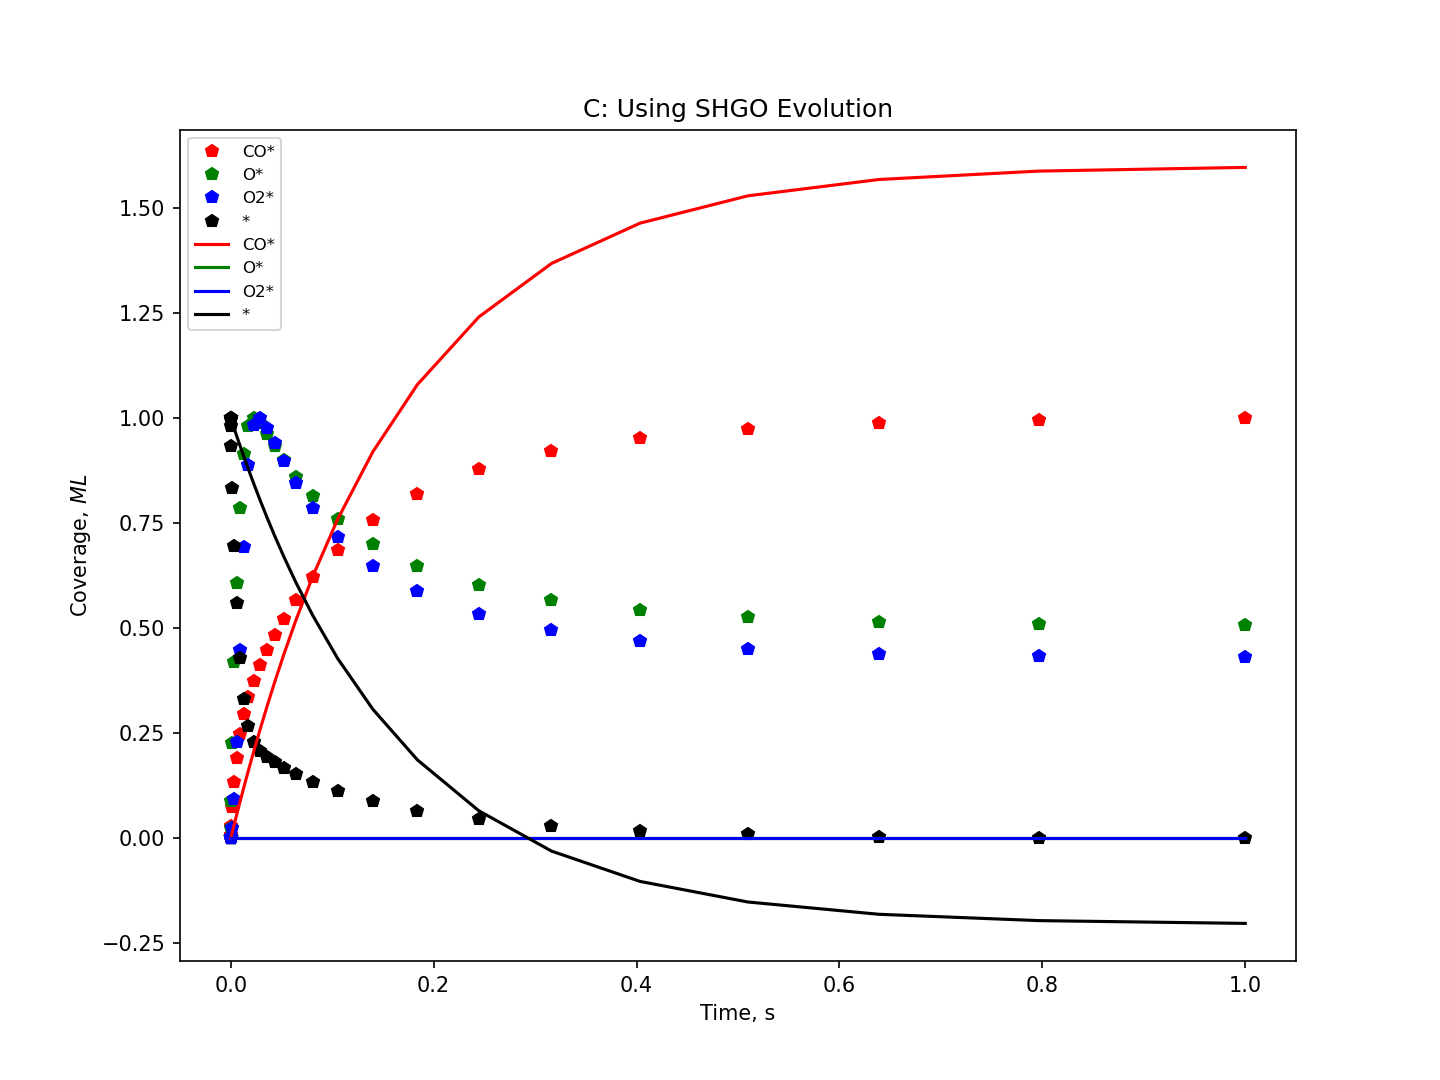

In [135]:
k_fit_c = res_c.x
print(k_fit_c)
c_fit = Kinetics(k_fit_c,Atomic,Stoich,C_dat[0,:],Time_t,Time_t)

C_fit_CO = (c_fit[:,0]-minCO)/(maxCO-minCO)
C_fit_O = (c_fit[:,1]-minO)/(maxO-minO)
C_fit_O2 = (c_fit[:,2]-minO2)/(maxO2-minO2)
C_fit_E = (c_fit[:,3]-minE)/(maxE-minE)

plt.figure()
#Replotting the extracted dataset
plt.plot(Time_tn, C_t_COn,'rp', label='CO*')        
plt.plot(Time_tn, C_t_On,'gp', label='O*') 
plt.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
plt.plot(Time_tn, C_t_En, 'kp', label='*') 

#Plotting the fit

plt.plot(Time_tn, C_fit_CO,'r-', label='CO*')        
plt.plot(Time_tn, C_fit_O,'g-', label='O*') 
plt.plot(Time_tn, C_fit_O2, 'b-', label='O2*') 
plt.plot(Time_tn, C_fit_E, 'k-', label='*') 


plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=8, loc='best')
plt.title("C: Using SHGO Evolution")
plt.show()

# [ E ] Global Optimizer: Using Dual Annealing - Combination of CSA (Classical Simulated Annealing) and FSA (Fast Simulated Annealing)  [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html?highlight=dual_annealing#scipy.optimize.dual_annealing)

In [120]:
%%time
from scipy.optimize import dual_annealing    

def error_fun(Guessk,Atomic,Stoich,Time,Conc):
    Conc_init = Conc[0,:]
    y_estim = Kinetics(Guessk,Atomic,Stoich,Conc_init,Time,Time)
    y_estim[:,0] = (y_estim[:,0]-minCO)/(maxCO-minCO)
    y_estim[:,1] = (y_estim[:,1]-minO)/(maxO-minO)
    y_estim[:,2] = (y_estim[:,2]-minO2)/(maxO2-minO2)
    y_estim[:,3] = (y_estim[:,3]-minE)/(maxE-minE)    
    y_data = Conc
    return np.sum((y_data - y_estim) ** 2)

#max K Guess parameters
sc = 1e2 #scaling value
mkval = Guessk*sc #max kvals
bounds = np.empty([len(mkval),2])
for i in range(len(mkval)):
    bounds[i] = (0,mkval[i])
    
res_d = dual_annealing(error_fun,bounds= bounds,
                     args=(Atomic,Stoich,Time_t,C_dat),
                     maxiter=10, maxfun = 5000, seed=45)

CPU times: user 8min 20s, sys: 1.46 s, total: 8min 21s
Wall time: 8min 22s


[0.00000000e+00 1.00000000e-07 3.67692236e+02 8.90574075e+06
 4.43054705e+09 5.34091957e-03 1.00000000e-06 6.63685474e+02]


<IPython.core.display.Javascript object>


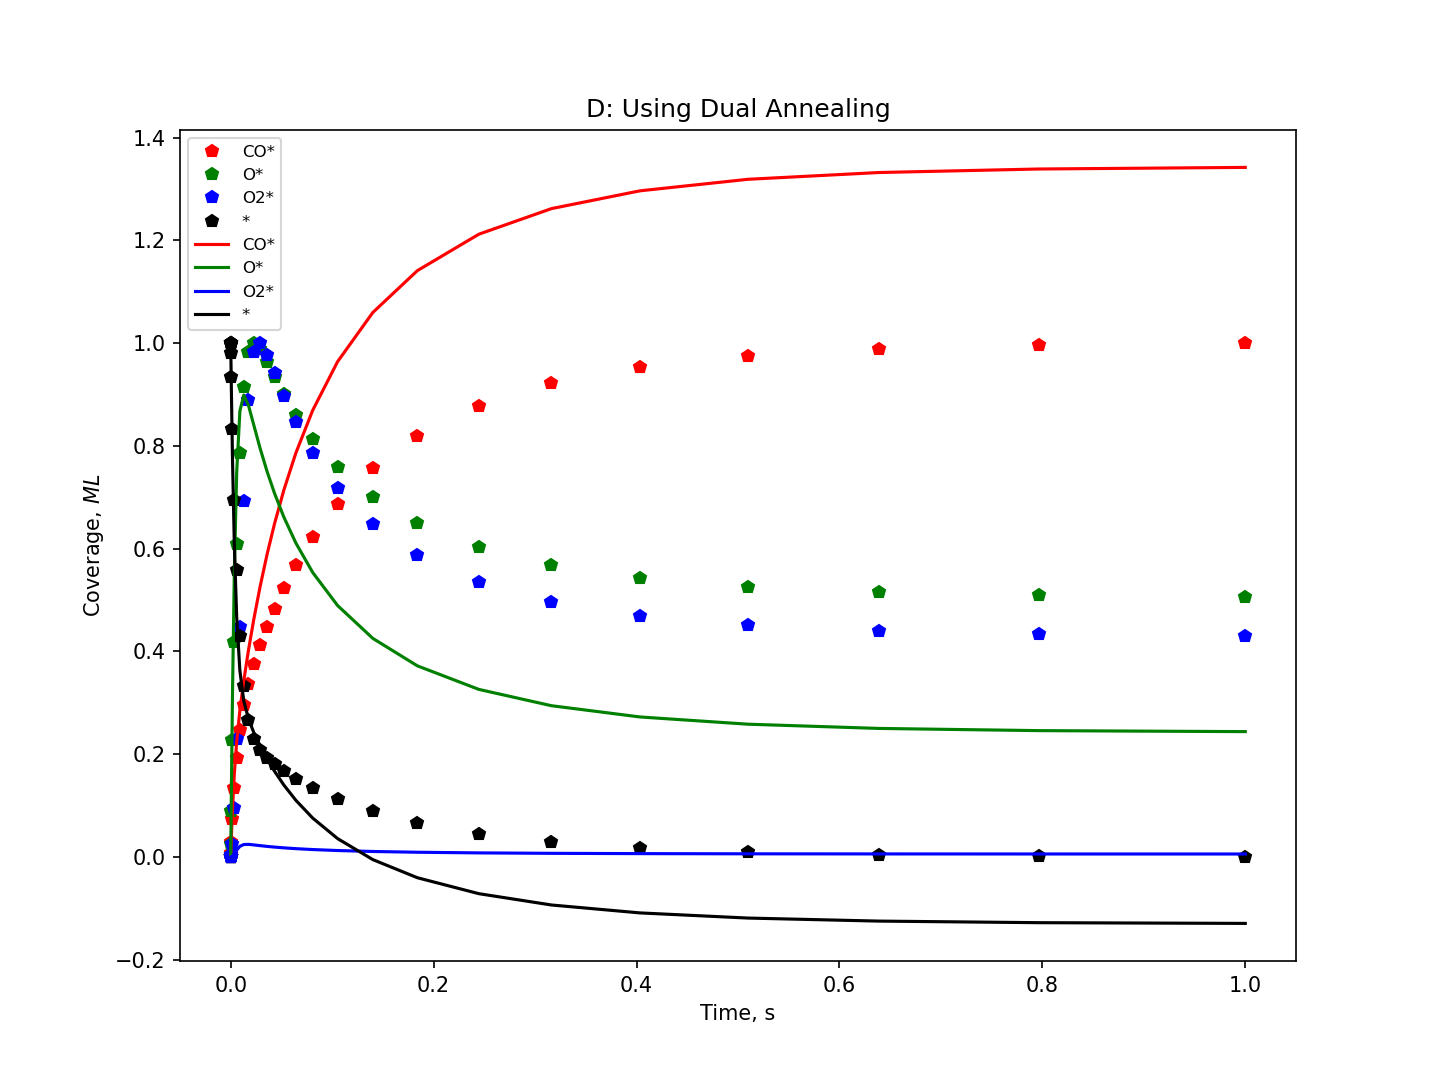

In [121]:
k_fit_d = res_d.x
print(k_fit_d)
c_fit = Kinetics(k_fit_d,Atomic,Stoich,C_dat[0,:],Time_t,Time_t)

C_fit_CO = (c_fit[:,0]-minCO)/(maxCO-minCO)
C_fit_O = (c_fit[:,1]-minO)/(maxO-minO)
C_fit_O2 = (c_fit[:,2]-minO2)/(maxO2-minO2)
C_fit_E = (c_fit[:,3]-minE)/(maxE-minE)

plt.figure()
#Replotting the extracted dataset
plt.plot(Time_tn, C_t_COn,'rp', label='CO*')        
plt.plot(Time_tn, C_t_On,'gp', label='O*') 
plt.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
plt.plot(Time_tn, C_t_En, 'kp', label='*') 

#Plotting the fit

plt.plot(Time_tn, C_fit_CO,'r-', label='CO*')        
plt.plot(Time_tn, C_fit_O,'g-', label='O*') 
plt.plot(Time_tn, C_fit_O2, 'b-', label='O2*') 
plt.plot(Time_tn, C_fit_E, 'k-', label='*') 


plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=8, loc='best')
plt.title("D: Using Dual Annealing")
plt.show()

In [76]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

from lmfit.model import load_model

if not os.path.exists('sinemodel.sav'):
    os.system(f"{sys.executable} doc_model_savemodel.py")


def mysine(x, amp, freq, shift):
    return amp * np.sin(x*freq + shift)


data = np.loadtxt('sinedata.dat')
x = data[:, 0]
y = data[:, 1]

model = load_model('sinemodel.sav', funcdefs={'mysine': mysine})
params = model.make_params(amp=dict(value=3, min=0),
                           freq=0.52,
                           shift=dict(value=0, min=-1, max=1))

result = model.fit(y, params, x=x)
print(result.fit_report())

plt.plot(x, y, 'o')
plt.plot(x, result.best_fit, '-')
plt.show()

/Users/klkusima/opt/anaconda3/bin/python: can't open file '/Users/klkusima/Desktop/RASH Research/CO_ox/Kinetics/OOP_Kinetics/MiKi/Input data_KMC/KMC_output_varied_coverage/Testing_NUMBA_OPT_Folder 2_Matrix CO Oxidation Microkinetic model (with Fitting)/doc_model_savemodel.py': [Errno 2] No such file or directory


FileNotFoundError: sinedata.dat not found.